# `A` Implementing and traversing a linked list

Practice implementing a basic linked list—something like this:  

## 2 --> 1 --> 3 --> 4 --> 5 --> NONE
HEAD


## Exercise 1 - Implementing a simple linked list
Now that we've talked about the abstract characteristics that we want our linked list to have, let's look at how we might implement one in Python.

#### Step 1.  Once you've seen the walkthrough, give it a try for yourself:
* Create a `Node` class with `value` and `next` attributes
* Use the class to create the `head` node with the value `2`
* Create and link a second node containing the value `1`
* Try printing the values (`1` and `2`) on the nodes you created (to make sure that you can access them!)

In [1]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None

head = Node(2)
head.next = Node(1)

print(head.value)
print(head.next.value)

2
1


At this point, our linked list looks like this:  
## 2 --> 1 --> NONE
HEAD

### Our goal is to extend the list until it looks like this:
## 2 --> 1 --> 3 --> 4 --> 5 --> NONE
HEAD

To do this, we need to create three more nodes, and we need to attach each one to the `next` attribute of the node that comes before it. Notice that we don't have a direct reference to any of the nodes other than the `head` node!

See if you can write the code to finish creating the above list:

#### Step 2.  Add three more nodes to the list, with the values `4`, `3`, and `5`

In [2]:
head.next.next = Node(4)
head.next.next.next = Node(3)
head.next.next.next.next = Node(5)

In [3]:
print(head.value)
print(head.next.value)
print(head.next.next.value)
print(head.next.next.next.value)
print(head.next.next.next.next.value)

2
1
4
3
5


## Exercise 2 -  Traversing the list
We successfully created a simple linked list. But printing all the values like we did above was pretty tedious. What if we had a list with 1,000 nodes? 

Let's see how we might traverse the list and print all the values, no matter how long it might be.

#### Step 3.  Write a function that loops through the nodes of the list and prints all of the values

In [4]:
def print_linked_list(head):
    current_node = head
    
    while current_node is not None:
        print(current_node.value)
        current_node = current_node.next
        
print_linked_list(head)

2
1
4
3
5


## Creating a linked list using iteration

Previously, we created a linked list using a very manual and tedious method. We called `next` multiple times on our `head` node. 

Now that we know about iterating over or traversing the linked list, is there a way we can use that to create a linked list?

We've provided our solution below—but it might be a good exercise to see what you can come up with first. Here's the goal:

#### Step 4.  See if you can write the code for the `create_linked_list` function below
* The function should take a Python list of values as input and return the `head` of a linked list that has those values
* There's some test code, and also a solution, below—give it a try for yourself first, but don't hesitate to look over the solution if you get stuck

In [5]:
def create_linked_list(input_list):
    head = None
    for value in input_list:
        if head is None:
            head = Node(value)    
        else:
        # Move to the tail (the last node)
            current_node = head
            while current_node.next:
                current_node = current_node.next
        
            current_node.next = Node(value)
    return head

Test your function by running this cell:

In [6]:
### Test Code
def test_function(input_list, head):
    try:
        if len(input_list) == 0:
            if head is not None:
                print("Fail")
                return
        for value in input_list:
            if head.value != value:
                print("Fail")
                return
            else:
                head = head.next
        print("Pass")
    except Exception as e:
        print("Fail: "  + e)
        
        

input_list = [1, 2, 3, 4, 5, 6]
head = create_linked_list(input_list)
test_function(input_list, head)

input_list = [1]
head = create_linked_list(input_list)
test_function(input_list, head)

input_list = []
head = create_linked_list(input_list)
test_function(input_list, head)


Pass
Pass
Pass


### A more efficient solution

The above solution works, but it has some shortcomings. In this next walkthrough, we'll demonstrate a different approach and see how its efficiency compares to the solution above.

In [7]:
def create_linked_list_better(input_list):
    
    head = None
    tail = None
    
    for value in input_list:
        
        if head is None:
            head = Node(value)
            tail = head # when we only have 1 node, head and tail refer to the same node
        else:
            tail.next = Node(value) # attach the new node to the `next` of tail
            tail = tail.next # update the tail
            
    return head

In [8]:
### Test Code
def test_function(input_list, head):
    try:
        if len(input_list) == 0:
            if head is not None:
                print("Fail")
                return
        for value in input_list:
            if head.value != value:
                print("Fail")
                return
            else:
                head = head.next
        print("Pass")
    except Exception as e:
        print("Fail: "  + e)
        
        

input_list = [1, 2, 3, 4, 5, 6]
head = create_linked_list_better(input_list)
test_function(input_list, head)

input_list = [1]
head = create_linked_list_better(input_list)
test_function(input_list, head)

input_list = []
head = create_linked_list_better(input_list)
test_function(input_list, head)

Pass
Pass
Pass


# `B`Types of Linked Lists

In this notebook we'll explore three versions of linked-lists: singly-linked lists, doubly-linked lists, and circular lists.

## 1. Singly Linked Lists

In this linked list, each node in the list is connected only to the next node in the list. 

## 2 --> 1 --> 3 --> 4 --> 5

This connection is typically implemented by setting the `next` attribute on a node object itself.

In [9]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None

In [10]:
# A small linked list:

head = Node(1)
head.next = Node(2)

Above we have a simple linked list with two elements, `[1, 2]`. Usually you'll want to create a `LinkedList` class as a wrapper for the nodes themselves and to provide common methods that operate on the list. For example you can implement an `append` method that adds a value to the end of the list. Note that if we're only tracking the head of the list, this runs in linear time - $O(N)$ - since you have to iterate through the entire list to get to the tail node. However, prepending (adding to the head of the list) can be done in constant $O(1)$ time. You'll implement this `prepend` method in the `Linked List Practice.ipynb` notebook.

In [11]:
class LinkedList:
    def __init__(self):
        self.head = None
        
    def append(self, value):
        if self.head is None:
            self.head = Node(value)
            return
        
        # Move to the tail (the last node)
        node = self.head
        while node.next:
            node = node.next
        
        node.next = Node(value)
        return

In [12]:
linked_list = LinkedList()
linked_list.append(1)
linked_list.append(2)
linked_list.append(4)

node = linked_list.head
while node:
    print(node.value)
    node = node.next

1
2
4


### Exercise: Add a method `to_list()` to `LinkedList` that converts a linked list back into a Python list.

In [13]:
# Solution

class LinkedList:
    def __init__(self):
        self.head = None

    def append(self, value):
        if self.head is None:
            self.head = Node(value)
            return

        # Move to the tail (the last node)
        node = self.head
        while node.next:
            node = node.next

        node.next = Node(value)
        return

    def to_list(self):
        out_list = []

        node = self.head
        while node:
            out_list.append(node.value)
            node = node.next

        return out_list


In [14]:
# Test your method here
linked_list = LinkedList()
linked_list.append(3)
linked_list.append(2)
linked_list.append(-1)
linked_list.append(0.2)

print ("Pass" if  (linked_list.to_list() == [3, 2, -1, 0.2]) else "Fail")

Pass


## 2. Doubly Linked Lists

This type of list has connections backwards and forwards through the list.

## 2 <--> 1 <--> 3 <--> 4 <--> 5

In [15]:
class DoubleNode:
    def __init__(self, value):
        self.value = value
        self.next = None
        self.previous = None

Now that we have backwards connections it makes sense to track the tail of the linked list as well as the head.

### Exercise: Implement a doubly linked list that can append to the tail in constant time. Make sure to include forward and backward connections when adding a new node to the list.

In [16]:
# Solution

class DoublyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
    
    def append(self, value):
        
        # TODO: Implement this method to append to the tail of the list
        
        if self.head is None:
            self.head = DoubleNode(value)
            self.tail = self.head
            return
            
        self.tail.next = DoubleNode(value)
        self.tail.next.previous = self.tail
        self.tail = self.tail.next
        return


In [17]:
# Test your class here

linked_list = DoublyLinkedList()
linked_list.append(1)
linked_list.append(-2)
linked_list.append(4)

print("Going forward through the list, should print 1, -2, 4")
node = linked_list.head
while node:
    print(node.value)
    node = node.next

print("\nGoing backward through the list, should print 4, -2, 1")
node = linked_list.tail
while node:
    print(node.value)
    node = node.previous

Going forward through the list, should print 1, -2, 4
1
-2
4

Going backward through the list, should print 4, -2, 1
4
-2
1


## 3. Circular Linked Lists

Circular linked lists occur when the chain of nodes links back to itself somewhere. For example `NodeA -> NodeB -> NodeC -> NodeD -> NodeB` is a circular list because `NodeD` points back to `NodeB` creating a loop `NodeB -> NodeC -> NodeD -> NodeB`. 

##  2 --> 1 --> 3 --> 4 --> 5
          ^                    /
            \                /
               \           / 
                  - - - - -  

A circular linked list is typically considered pathological because when you try to iterate through it, you'll never find the end. We usually want to detect if there is a loop in our linked lists to avoid these problems. You'll get a chance to implement a solution for detecting loops later in the lesson.

# `C` Linked List Practice

Implement a linked list class. You have to define a few functions that perform the desirbale action. Your `LinkedList` class should be able to:

+ Append data to the tail of the list and prepend to the head
+ Search the linked list for a value and return the node
+ Remove a node
+ Pop, which means to return the first node's value and delete the node from the list
+ Insert data at some position in the list
+ Return the size (length) of the linked list

In [ ]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None

In [ ]:
class LinkedList:
    def __init__(self):
        self.head = None

    def to_list(self):
        out = []
        node = self.head
        while node:
            out.append(node.value)
            node = node.next
        return out

#### Task 1. Write definition of `prepend()` function and test its functionality

In [ ]:
# Define a function outside of the class
def prepend(self, value):
    """ Prepend a node to the beginning of the list """

    if self.head is None:
        self.head = Node(value)
        return

    new_head = Node(value)
    new_head.next = self.head
    self.head = new_head
    
# This is the way to add a function to a class after it has been defined
LinkedList.prepend = prepend

In [ ]:
# Test prepend
linked_list = LinkedList()
linked_list.prepend(1)
assert linked_list.to_list() == [1], f"list contents: {linked_list.to_list()}"

#### Task 2. Write definition of `append()` function and test its functionality

In [ ]:
def append(self, value):
    """ Append a node to the end of the list """
    # Here I'm not keeping track of the tail. It's possible to store the tail
    # as well as the head, which makes appending like this an O(1) operation.
    # Otherwise, it's an O(N) operation as you have to iterate through the
    # entire list to add a new tail.

    if self.head is None:
        self.head = Node(value)
        return

    node = self.head
    while node.next:
        node = node.next

    node.next = Node(value)

In [ ]:
# Test append - 1
linked_list.append(3)
linked_list.prepend(2)
assert linked_list.to_list() == [2, 1, 3], f"list contents: {linked_list.to_list()}"

In [ ]:
# Test append - 2
linked_list = LinkedList()
linked_list.append(1)
assert linked_list.to_list() == [1], f"list contents: {linked_list.to_list()}"
linked_list.append(3)
assert linked_list.to_list() == [1, 3], f"list contents: {linked_list.to_list()}"

#### Task 3. Write definition of `search()` function and test its functionality

In [ ]:
def search(self, value):
    """ Search the linked list for a node with the requested value and return the node. """
    if self.head is None:
        return None

    node = self.head
    while node:
        if node.value == value:
            return node
        node = node.next

    raise ValueError("Value not found in the list.")


In [ ]:
# Test search
linked_list.prepend(2)
linked_list.prepend(1)
linked_list.append(4)
linked_list.append(3)
assert linked_list.search(1).value == 1, f"list contents: {linked_list.to_list()}"
assert linked_list.search(4).value == 4, f"list contents: {linked_list.to_list()}"

#### Task 4. Write definition of `remove()` function and test its functionality

In [ ]:
def remove(self, value):
    """ Delete the first node with the desired data. """
    if self.head is None:
        return

    if self.head.value == value:
        self.head = self.head.next
        return

    node = self.head
    while node.next:
        if node.next.value == value:
            node.next = node.next.next
            return
        node = node.next

    raise ValueError("Value not found in the list.")

In [ ]:
# Test remove
linked_list.remove(1)
assert linked_list.to_list() == [2, 1, 3, 4, 3], f"list contents: {linked_list.to_list()}"
linked_list.remove(3)
assert linked_list.to_list() == [2, 1, 4, 3], f"list contents: {linked_list.to_list()}"
linked_list.remove(3)
assert linked_list.to_list() == [2, 1, 4], f"list contents: {linked_list.to_list()}"

#### Task 5. Write definition of `pop()` function and test its functionality

In [ ]:
def pop(self):
    """ Return the first node's value and remove it from the list. """
    if self.head is None:
        return None

    node = self.head
    self.head = self.head.next

    return node.value

In [ ]:
# Test pop
value = linked_list.pop()
assert value == 2, f"list contents: {linked_list.to_list()}"
assert linked_list.head.value == 1, f"list contents: {linked_list.to_list()}"

#### Task 6. Write definition of `insert()` function and test its functionality

In [ ]:
def insert(self, value, pos):
    """ Insert value at pos position in the list. If pos is larger than the
        length of the list, append to the end of the list. """
    # If the list is empty 
    if self.head is None:
        self.head = Node(value)
        return
        
    if pos == 0:
        self.prepend(value)
        return

    index = 0
    node = self.head
    while node.next and index <= pos:
        if (pos - 1) == index:
            new_node = Node(value)
            new_node.next = node.next
            node.next = new_node
            return

        index += 1
        node = node.next
    else:
        self.append(value)

In [ ]:
# Test insert 
linked_list.insert(5, 0)
assert linked_list.to_list() == [5, 1, 4], f"list contents: {linked_list.to_list()}"
linked_list.insert(2, 1)
assert linked_list.to_list() == [5, 2, 1, 4], f"list contents: {linked_list.to_list()}"
linked_list.insert(3, 6)
assert linked_list.to_list() == [5, 2, 1, 4, 3], f"list contents: {linked_list.to_list()}"

#### Task 7. Write definition of `size()` function and test its functionality

In [ ]:
def size(self):
    """ Return the size or length of the linked list. """
    size = 0
    node = self.head
    while node:
        size += 1
        node = node.next

    return size

In [ ]:
# Test size function
assert linked_list.size() == 5, f"list contents: {linked_list.to_list()}"

In [ ]:
def to_list(self):
    out = []
    node = self.head
    while node:
        out.append(node.value)
        node = node.next
    return out

# `D` Reversing a linked list exercise

Given a singly linked list, return another linked list that is the reverse of the first.

In [18]:
# Helper Code

class Node:
    def __init__(self, value):
        self.value = value
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None
        
    def append(self, value):
        if self.head is None:
            self.head = Node(value)
            return
        
        node = self.head
        while node.next:
            node = node.next

        node.next = Node(value)
        
    def __iter__(self):
        node = self.head
        while node:
            yield node.value
            node = node.next
            
    def __repr__(self):
        return str([v for v in self])

In [19]:
# Solution

# Time complexity O(N)
def reverse(linked_list):
    """
    Reverse the inputted linked list

    Args:
       linked_list(obj): Linked List to be reversed
    Returns:
       obj: Reveresed Linked List
    """
    new_list = LinkedList()
    
    prev_node = None

    """
    A simple idea - Pick a node from the original linked list traversing form the beginning, and 
    prepend it to the new linked list. 
    We have to use a loop to iterate over the nodes of original linked list
    """
    # In this "for" loop, the "value" is just a variable whose value will be updated in each iteration
    for value in linked_list:
        # create a new node
        new_node = Node(value)
        
        # Make the new_node.next point to the 
        # node created in previous iteration
        new_node.next = prev_node 
        
        # This is the last statement of the loop
        # Mark the current new node as the "prev_node" for next iteration
        prev_node = new_node
    
    # Update the new_list.head to point to the final node that came out of the loop
    new_list.head = prev_node
    
    return new_list


In [21]:
llist = LinkedList()
for value in [4,2,5,1,-3,0]:
    llist.append(value)

flipped = reverse(llist)
is_correct = list(flipped) == list([0,-3,1,5,2,4]) and list(llist) == list(reverse(flipped))
print("Pass" if is_correct else "Fail")

Pass


# `E` Detecting Loops in Linked Lists

In this notebook, you'll implement a function that detects if a loop exists in a linked list. The way we'll do this is by having two pointers, called "runners", moving through the list at different rates. Typically we have a "slow" runner which moves at one node per step and a "fast" runner that moves at two nodes per step.

If a loop exists in the list, the fast runner will eventually move behind the slow runner as it moves to the beginning of the loop. Eventually it will catch up to the slow runner and both runners will be pointing to the same node at the same time. If this happens then you know there is a loop in the linked list. Below is an example where we have a slow runner (the green arrow) and a fast runner (the red arrow).

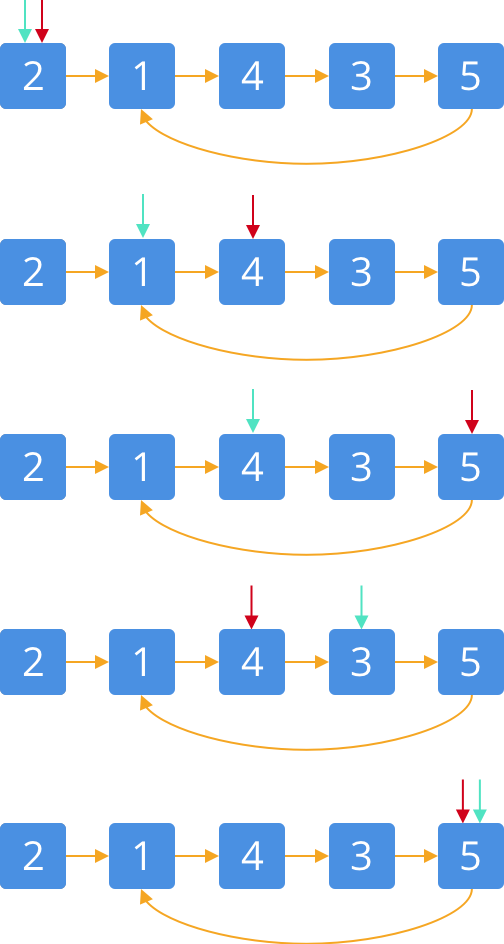

In [22]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None
        
class LinkedList:
    def __init__(self, init_list=None):
        self.head = None
        if init_list:
            for value in init_list:
                self.append(value)
        
    def append(self, value):
        if self.head is None:
            self.head = Node(value)
            return
        
        # Move to the tail (the last node)
        node = self.head
        while node.next:
            node = node.next
        
        node.next = Node(value)
        return

In [23]:
list_with_loop = LinkedList([2, -1, 3, 0, 5])

# Creating a loop where the last node points back to the second node
loop_start = list_with_loop.head.next

node = list_with_loop.head
while node.next: 
    node = node.next   
node.next = loop_start

### Write the function definition here
**Exercise:** Given a linked list, implement a function `iscircular` that returns `True` if a loop exists in the list and `False` otherwise.

In [24]:
# Solution

def iscircular(linked_list):
    """
    Determine wether the Linked List is circular or not

    Args:
       linked_list(obj): Linked List to be checked
    Returns:
       bool: Return True if the linked list is circular, return False otherwise
    """

    if linked_list.head is None:
        return False
    
    slow = linked_list.head
    fast = linked_list.head
    
    while fast and fast.next:
        # slow pointer moves one node
        slow = slow.next
        # fast pointer moves two nodes
        fast = fast.next.next
        
        if slow == fast:
            return True
    
    # If we get to a node where fast doesn't have a next node or doesn't exist itself, 
    # the list has an end and isn't circular
    return False


In [25]:
# Test Cases

# Create another circular linked list
small_loop = LinkedList([0])
small_loop.head.next = small_loop.head

print ("Pass" if iscircular(list_with_loop) else "Fail")                  # Pass
print ("Pass" if iscircular(LinkedList([-4, 7, 2, 5, -1])) else "Fail")   # Fail
print ("Pass" if iscircular(LinkedList([1])) else "Fail")                 # Fail
print ("Pass" if iscircular(small_loop) else "Fail")                      # Pass
print ("Pass" if iscircular(LinkedList([])) else "Fail")                  # Fail


Pass
Fail
Fail
Pass
Fail


# `F` Flattening a nested linked list

Suppose you have a linked list where the value of each node is a sorted linked list (i.e., it is a _nested_ list). Your task is to _flatten_ this nested list—that is, to combine all nested lists into a single (sorted) linked list.

First, we'll need some code for generating nodes and a linked list:

In [33]:
# Helper code

# A class behaves like a data-type, just like an int, float or any other built-in ones. 
# User defined class
class Node:
    def __init__(self, value): # <-- For simple LinkedList, "value" argument will be an int, whereas, for NestedLinkedList, "value" will be a LinkedList
        self.value = value
        self.next = None
    
    def __repr__(self):
        return str(self.value)
    
# User defined class
class LinkedList: 
    def __init__(self, head): # <-- Expects "head" to be a Node made up of an int or LinkedList
        self.head = head
    
    '''
    For creating a simple LinkedList, we will pass an integer as the "value" argument
    For creating a nested LinkedList, we will pass a LinkedList as the "value" argument
    '''
    def append(self, value):
        
        # If LinkedList is empty
        if self.head is None:
            self.head = Node(value)
            return
        
        # Create a temporary Node object
        node = self.head
        
        # Iterate till the end of the currrent LinkedList
        while node.next is not None:
            node = node.next
        
        # Append the newly creataed Node at the end of the currrent LinkedList
        node.next = Node(value)

        
    '''We will need this function to convert a LinkedList object into a Python list of integers'''
    def to_list(self):
        out = []          # <-- Declare a Python list
        node = self.head  # <-- Create a temporary Node object
        
        while node:       # <-- Iterate untill we have nodes available
            out.append(int(str(node.value))) # <-- node.value is actually of type Node, therefore convert it into int before appending to the Python list
            node = node.next
        
        return out

### Exercise - Write the two function definitions below
Now, in the cell below, see if you can solve the problem by implementing the `flatten` method.

**Hint**: If you first create a `merge` method that merges two linked lists into a sorted linked list, then there is an elegant recursive solution.

### Solution
First, let's implement a `merge` function that takes in two linked lists and returns one sorted linked list.  Note, this implementation expects both linked lists to be sorted.

In [34]:
def merge(list1, list2):
    # TODO: Implement this function so that it merges the two linked lists in a single, sorted linked list.
    '''
    The arguments list1, list2 must be of type LinkedList.
    The merge() function must return an instance of LinkedList.
    '''
    merged = LinkedList(None)
    if list1 is None:
        return list2
    if list2 is None:
        return list1
    list1_elt = list1.head
    list2_elt = list2.head
    while list1_elt is not None or list2_elt is not None:
        if list1_elt is None:
            merged.append(list2_elt)
            list2_elt = list2_elt.next
        elif list2_elt is None:
            merged.append(list1_elt)
            list1_elt = list1_elt.next
        elif list1_elt.value <= list2_elt.value:
            merged.append(list1_elt)
            list1_elt = list1_elt.next
        else:
            merged.append(list2_elt)
            list2_elt = list2_elt.next
    return merged


''' In a NESTED LinkedList object, each node will be a simple LinkedList in itself'''
class NestedLinkedList(LinkedList):
    def flatten(self):
        # TODO: Implement this method to flatten the linked list in ascending sorted order.
        return self._flatten(self.head) # <-- self.head is a node for NestedLinkedList

    '''  A recursive function ''' 
    def _flatten(self, node):
        
        # A termination condition
        if node.next is None:
            return merge(node.value, None) # <-- First argument is a simple LinkedList
        
        # _flatten() is calling itself untill a termination condition is achieved
        return merge(node.value, self._flatten(node.next)) # <-- Both arguments are a simple LinkedList each

In [35]:
# First Test scenario
''' Create a simple LinkedList'''
linked_list = LinkedList(Node(1)) # <-- Notice that we are passing a Node made up of an integer
linked_list.append(3) # <-- Notice that we are passing a numerical value as an argument in the append() function here 
linked_list.append(5)

''' Create another simple LinkedList'''
second_linked_list = LinkedList(Node(2))
second_linked_list.append(4)

''' Create a NESTED LinkedList, where each node will be a simple LinkedList in itself'''
nested_linked_list = NestedLinkedList(Node(linked_list)) # <-- Notice that we are passing a Node made up of a simple LinkedList object
nested_linked_list.append(second_linked_list) # <-- Notice that we are passing a LinkedList object in the append() function here

#### Structure of the nested linked list to be tested
`nested_linked_list` should now have 2 nodes.  The head node is a linked list containing `1, 3, 5`.  The second node is a linked list containing `2, 4`.

Calling `flatten` should return a linked list containing `1, 2, 3, 4, 5`.

In [36]:
solution = nested_linked_list.flatten() # <-- returns A LinkedList object

expected_list = [1,2,3,4,5] # <-- Python list

# Convert the "solution" into a Python list and compare with another Python list
assert solution.to_list() == expected_list, f"list contents: {solution.to_list()}"

In [37]:
''' Test merge() function'''
linked_list = LinkedList(Node(1))
linked_list.append(3)
linked_list.append(5)

second_linked_list = LinkedList(Node(2))
second_linked_list.append(4)

merged = merge(linked_list, second_linked_list)
node = merged.head
while node is not None:
    #This will print 1 2 3 4 5
    print(node.value)
    node = node.next
    
# Lets make sure it works with a None list
merged = merge(None, linked_list)
node = merged.head
while node is not None:
    #This will print 1 3 5
    print(node.value)
    node = node.next

1
2
3
4
5
1
3
5


In [38]:
''' Test flatten() function'''
nested_linked_list = NestedLinkedList(Node(linked_list))
nested_linked_list.append(second_linked_list)
flattened = nested_linked_list.flatten()

node = flattened.head
while node is not None:
    #This will print 1 2 3 4 5
    print(node.value)
    node = node.next

1
2
3
4
5


### Computational Complexity
Lets start with the computational complexity of `merge`.  Merge takes in two lists.  Let's say the lengths of the lists are $N_{1}$ and $N_{2}$. Because we assume the inputs are sorted, `merge` is very efficient. It looks at the first element of each list and adds the smaller one to the returned list.  Every time through the loop we are appending one element to the list, so it will take $N_{1} + N_{2}$ iterations until we have the whole list.

The complexity of `flatten` is a little more complicated to calculate.  Suppose our `NestedLinkedList` has $N$ linked lists and each list's length is represented by $M_{1}, M_{2}, ..., M_{N}$.

We can represent this recursion as:

$merge(M_{1}, merge(M_{2}, merge(..., merge(M_{N-1}, merge(M_{N}, None)))))$

Let's start from the inside.  The inner most merge returns the $nth$ linked list.  The next merge does $M_{N-1} + M_{N}$ comparisons.  The next merge does $M_{N-2} + M_{N-1} + M_{N}$ comparisons.

Eventually we will do $N$ comparisons on all of the $M_{N}$ elements. We will do $N-1$ comparisons on $M_{N-1}$ elements.

This can be generalized as:

$$
\sum_n^N n*M_{n}
$$

## `Q1`  ADD ONE

### Problem Statement

You are given a non-negative number in the form of list elements. For example, the number `123` would be provided as `arr = [1, 2, 3]`. Add one to the number and return the output in the form of a new list. 

**Example 1:**
* `input = [1, 2, 3]`
* `output = [1, 2, 4]`

**Example 2:**
* `input = [9, 9, 9]`
* `output = [1, 0, 0, 0]`

**Challenge:**

One way to solve this problem is to convert the input array into a number and then add one to it. For example, if we have `input = [1, 2, 3]`, you could solve this problem by creating the number `123` and then separating the digits of the output number `124`.

But can you solve it in some other way?



In [47]:
# Solution
'''
The Logic
1. The idea is to start checking the array from the right end, in a FOR loop. 
2. Add 1 to the digit, and check if it lies in the range 0-9 OR becomes 10.
3. If the updated digit is between 0-9, quit the FOR loop. (Example, original array is [1,2,3])
4. Otherwise update the current position in the array, and carry over the "borrow" to the next left digit. (Example, original array is [9,9,9])
5. Once, we finish iteratig over all the digits of the original array, we will be left with the final "borrow", either 0 or 1. Prepend this "borrow" to the original array. 
6. Return the updated array, but there is trick which helps us to select the starting index of the updated array. Example, [0, 1, 2, 4] is the updated array, and we want to return only [1, 2, 4]
'''


# Change the arr in-place
def add_one(arr):
    """
    :param: arr - list of digits representing some number x
    return a list with digits represengint (x + 1)
    """
    borrow = 1; # initial value
    
    """ 
    The three arguments of range() function are: 
    starting index, ending index(non-inclusive), and the increment/decrement value
    """ 
    # Traverse in reverse direction starting from the end of the list
    # The argument of range() functions are:
    # starting index, ending index (non exclusive), and the increment/decrement size
    for i in range(len(arr), 0, -1):     
        
        # The "digit" denotes the updated Unit, Tens, and then Hunderd  position iteratively
        digit = borrow + arr[i - 1]       
       
        '''
        The "borrow" will be carried to the next left digit 
        If the digit is between 0-9, borrrow will be 0. 
        If digit is 10, then the borrow will be 1.
        '''
        # The "//" is a floor division operator
        borrow = digit//10               

        if borrow == 0:
            # Update the arr[i - 1] with the updated digit, and quit the FOR loop.
            arr[i - 1] = digit
            break
        else:
            # Update the arr[i - 1] with the remainder of (digit % 10)
            arr[i - 1] = digit % 10
    
    # Prepend the final "borrow" to the original array.  
    arr = [borrow] + arr
    
    # In this final updated arr, find a position (starting index) from where to return the list.
    # For [0, 1, 2, 4] , the position (starting index) will be 1
    # For [1, 0, 0, 0] , the position (starting index) will be 0
    position = 0
    while arr[position]==0:
        position += 1

    return arr[position:]


In [ ]:
#-------------------------------------#
# Descriptive Example 1 - Original array is [1, 2, 3]
#-------------------------------------#

'''
FOR LOOP BEGINS
    For i=3 , arr[2]=3 , digit=4 , borrow=0
        BORROW COMPARISON START
            Since borrow is 0, update arr[2] = digit =  4 and quit the FOR loop.
            NO need to check other digits on the left of current digit
FOR LOOP ENDS

Append  [0] to the beginning of the original arr. Now arr = [0, 1, 2, 4]
In this final updated arr, find a position from where to return the list. This position (index) =  1
Return  [1, 2, 4]

'''
#-------------------------------------#
# Descriptive Example 2 - Original array is [9, 9, 9]
#-------------------------------------#
'''
FOR LOOP BEGINS
    For i=  3 , arr[ 2 ] =  9 , digit =  10 , borrow =  1
        BORROW COMPARISON START
            Since borrow is non-zero, update arr[ 2 ] = digit % 10 =  0
            Update output = borrow = 1
        BORROW COMPARISON ENDS 

    For i=  2 , arr[ 1 ] =  9 , digit =  10 , borrow =  1
        BORROW COMPARISON START
            Since borrow is non-zero, update arr[ 1 ] = digit % 10 =  0
            Update output = borrow = 1
        BORROW COMPARISON ENDS 

    For i=  1 , arr[ 0 ] =  9 , digit =  10 , borrow =  1
        BORROW COMPARISON START
            Since borrow is non-zero, update arr[ 0 ] = digit % 10 =  0
            Update output = borrow = 1
        BORROW COMPARISON ENDS 

FOR LOOP ENDS

Append  [1] to the beginning of the original arr. Now arr = [1, 0, 0, 0]

In this final updated arr, find a position from where to return the list. This position (index) =  0
Return  [1, 0, 0, 0] 
'''

In [48]:
# A helper function for Test Cases
def test_function(test_case):
    arr = test_case[0]
    solution = test_case[1]
    
    output = add_one(arr)
    for index, element in enumerate(output):
        if element != solution[index]:
            print("Fail")
            return
    print("Pass")      

In [49]:
# Test Case 1
arr = [0]
solution = [1]
test_case = [arr, solution]
test_function(test_case)

# Test Case 2
arr = [1, 2, 3]
solution = [1, 2, 4]
test_case = [arr, solution]
test_function(test_case)

# Test Case 3
arr = [9, 9, 9]
solution = [1, 0, 0, 0]
test_case = [arr, solution]
test_function(test_case)

Pass
Pass
Pass


## `Q2`  DUPLICATE NUMBER
### Problem Statement

You have been given an array of `length = n`. The array contains integers from `0` to `n - 2`. Each number in the array is present exactly once except for one number which is present twice. Find and return this duplicate number present in the array

**Example:**
* `arr = [0, 2, 3, 1, 4, 5, 3]`
* `output = 3` (because `3` is present twice)

The expected time complexity for this problem is `O(n)` and the expected space-complexity is `O(1)`.

In [50]:
def duplicate_number(arr):
    """
    :param - array containing numbers in the range [0, len(arr) - 2]
    return - the number that is duplicate in the arr
    """
    current_sum = 0
    expected_sum = 0
    
    # Traverse the original array in the forward direction 
    for num in arr:
        current_sum += num
    
    
    # Traverse from 0 to (length of array-1) to get the expected_sum
    # Alternatively, you can use the formula for sum of an Arithmetic Progression to get the expected_sum
    
    # The argument of range() functions are:
    # starting index [OPTIONAL], ending index (non exclusive), and the increment/decrement size [OPTIONAL]
    # It means that if the array length = n, loop will run form 0 to (n-2)
    for i in range(len(arr) - 1):
        expected_sum += i
    
    
    # The difference between the 
    return current_sum - expected_sum



Notice carefully that
1. All the elements of the array are always non-negative
2. If array length = n, then elements would start from 0 to (n-2), i.e. Natural numbers 0,1,2,3,4,5...(n-2)
3. There is only SINGLE element which is present twice.

Therefore let's find the sum of all elements (current_sum) of the original array, and
find the sum of first (n-2) Natural numbers (expected_sum).

Trick: 
+ The second occurance of a particular number (say `x`) is actually occupying the space that would have been utilized by the number (n-1). This leads to: 
+ current_sum  = 0 + 1 + 2 + 3 + .... + (n-2) + x
+ expected_sum = 0 + 1 + 2 + 3 + .... + (n-2)
+ current_sum - expected_sum = x 



In [51]:
def test_function(test_case):
    arr = test_case[0]
    solution = test_case[1]
    output = duplicate_number(arr)
    if output == solution:
        print("Pass")
    else:
        print("Fail")

In [52]:
arr = [0, 0]
solution = 0

test_case = [arr, solution]
test_function(test_case)


arr = [0, 2, 3, 1, 4, 5, 3]
solution = 3

test_case = [arr, solution]
test_function(test_case)


arr = [0, 1, 5, 4, 3, 2, 0]
solution = 0

test_case = [arr, solution]
test_function(test_case)


arr = [0, 1, 5, 5, 3, 2, 4]
solution = 5

test_case = [arr, solution]
test_function(test_case)

Pass
Pass
Pass
Pass


## `Q3` Max Sum Subarray
### Problem Statement

You have been given an array containg numbers. Find and return the largest sum in a contiguous subarray within the input array.

**Example 1:**
* `arr= [1, 2, 3, -4, 6]`
* The largest sum is `8`, which is the sum of all elements of the array.

**Example 2:**
* `arr = [1, 2, -5, -4, 1, 6]`
* The largest sum is `7`, which is the sum of the last two elements of the array.



 

In [55]:
def max_sum_subarray(arr):
    """
    :param - arr - input array
    return - number - largest sum in contiguous subarry within arr
    """
    current_sum = arr[0] # `current_sum` denotes the sum of a subarray
    max_sum = arr[0]     # `max_sum` denotes the maximum value of `current_sum` ever
    
    # Loop from VALUE at index position 1 till the end of the array
    for element in arr[1:]:
        
        '''
        # Compare (current_sum + element) vs (element)
        # If (current_sum + element) is higher, it denotes the addition of the element to the current subarray
        # If (element) alone is higher, it denotes the starting of a new subarray
        '''
        current_sum = max(current_sum + element, element)
        
        # Update (overwrite) `max_sum`, if it is lower than the updated `current_sum`
        max_sum = max(current_sum, max_sum)   
    
    return max_sum


### Solution

The Idea:
1. We have to find the sum of "contiguous" subarray, therefore we must not change the order of array elements.
2. Let `current_sum` denotes the sum of a subarray, and `max_sum` denotes the maximum value of `current_sum`.
3. LOOP STARTS: For each element of the array, update the `current_sum` with the MAXIMUM of either:
 - The element added to the `current_sum` (denotes the addition of the element to the current subarray)
 - The element itself  (denotes the starting of a new subarray)
 - Update (overwrite) `max_sum`, if it is lower than the updated `current_sum`
4. Return `max_sum`


In [56]:
def test_function(test_case):
    arr = test_case[0]
    solution = test_case[1]
    
    output = max_sum_subarray(arr)
    if output == solution:
        print("Pass")
    else:
        print("Fail")

In [57]:
arr= [1, 2, 3, -4, 6]
solution= 8 # sum of array

test_case = [arr, solution]
test_function(test_case)


arr = [1, 2, -5, -4, 1, 6]
solution = 7   # sum of last two elements

test_case = [arr, solution]
test_function(test_case)


arr = [-12, 15, -13, 14, -1, 2, 1, -5, 4]
solution = 18  # sum of subarray = [15, -13, 14, -1, 2, 1]

test_case = [arr, solution]
test_function(test_case)

Pass
Pass
Pass


## `Q4` Pascal's Triangle
### Problem Statement

Find and return the `nth` row of Pascal's triangle in the form a list. `n` is 0-based.

For exmaple, if `n = 4`, then `output = [1, 4, 6, 4, 1]`.

To know more about Pascal's triangle: https://www.mathsisfun.com/pascals-triangle.html

In [58]:
def nth_row_pascal(n):
    """
    :param: - n - index (0 based)
    return - list() representing nth row of Pascal's triangle
    """
    if n == 0:
        return [1]
    
    current_row = [1] # First row
    
    ''' Loop from 1 to n; `i` denotes the row number'''
    for i in range(1, n + 1):
        # Set the `current_row` from previous iteration as the `previous_row`
        previous_row = current_row
        
        # Let's build the fresh current_row gradually
        current_row = [1] # add the default first element at the 0^th index of the `i^th` row
        
        '''Loop from 1 to (i-1); `j` denotes the index of an element with in the `i^th` row'''
        # Example, for 5th row we have considered n=4, 
        # we will iterate index from 1 to 3, because 
        # the default element at the 0^th index has already been added
        for j in range(1, i):
            
            # An element at position `j` in the current row is the 
            # sum of elements at position `j` and `j-1` in the previous row.
            next_number = previous_row[j] + previous_row[j - 1]
            
            # Append the new element to the current_row
            current_row.append(next_number)
            
        current_row.append(1) # append the default last element
    return current_row

In [59]:
def test_function(test_case):
    n = test_case[0]
    solution = test_case[1]
    output = nth_row_pascal(n)
    if solution == output:
        print("Pass")
    else:
        print("Fail")

In [60]:
n = 0
solution = [1]

test_case = [n, solution]
test_function(test_case)


n = 1
solution = [1, 1]

test_case = [n, solution]
test_function(test_case)


n = 2
solution = [1, 2, 1]

test_case = [n, solution]
test_function(test_case)


n = 3
solution = [1, 3, 3, 1]

test_case = [n, solution]
test_function(test_case)


n = 4
solution = [1, 4, 6, 4, 1]

test_case = [n, solution]
test_function(test_case)


Pass
Pass
Pass
Pass
Pass


## `Q5` Even After Odd
### Problem Statement

Given a linked list with integer data, arrange the elements in such a manner that all nodes with even numbers are placed after odd numbers. **Do not create any new nodes and avoid using any other data structure. The relative order of even and odd elements must not change.** 

**Example:**
* `linked list = 1 2 3 4 5 6`
* `output = 1 3 5 2 4 6`

In [61]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None



The Idea: Traverse the given LinkedList, and build two sub-lists: EVEN and ODD. 
+ For this purpose, we will use four helper references, that denotes starting and current ending of EVEN and ODD sub-list respectively. 

1. For each Node in the LinkedList, check if its data is even/odd. 
Change the "next" reference (pointer) of each Node, based on the following rules:
 - First even valued Node will be referenced by head of EVEN sub-list
 - Subsequent even valued Node will be appended to the tail of EVEN sub-list

 - First odd valued Node will be referenced by head of ODD sub-list
 - Subsequent odd valued Node will be appended to the tail of ODD sub-list
 
2. After the loop, append the EVEN sub-list to the tail of ODD sub-list.


In [63]:
def even_after_odd(head):
    """
    :param - head - head of linked list
    return - updated list with all even elements are odd elements
    """
    if head is None:
        return head
    
    # Helper references
    ''' `even_head` and `even_tail` represents the starting and current ending of the "EVEN" sub-list '''
    even_head = None                    
    even_tail = None
    
    ''' `odd_head` and `odd_tail` represents the starting and current ending of the "ODD" sub-list '''
    odd_head = None
    odd_tail = None
    
    current = head                  # <-- "current" represents the current Node. 
    
    # Loop untill there are Nodes available in the LinkedList
    while current:                  # <-- "current" will be updated at the end of each iteration
        
        next_node = current.next    # <-- "next_node" represents the next Node w.r.t. the current Node
        
        if current.data % 2 == 0:   # <-- current Node is even
            
            # Below 
            if even_head is None:   # <-- Make the current Node as the starting Node of EVEN sub-list
                even_head = current     # `even_head` will now point where `current` is already pointing
                even_tail = even_head     
            else:                   # <-- Append the current even node to the tail of EVEN sub-list 
                even_tail.next = current
                even_tail = even_tail.next
        else:
            if odd_head is None:    # <-- Make the current Node as the starting Node of ODD sub-list
                odd_head = current
                odd_tail = odd_head
            else:                   # <-- Append the current odd node to the tail of ODD sub-list 
                odd_tail.next = current
                odd_tail = odd_tail.next
        current.next = None
        current = next_node         # <-- Update "head" Node, for next iteration
    
    if odd_head is None:            # <-- Special case, when there are no odd Nodes 
        return even_head

    odd_tail.next = even_head       # <-- Append the EVEN sub-list to the tail of ODD sub-list
    
    return odd_head

In [64]:
# helper functions for testing purpose
def create_linked_list(arr):
    if len(arr)==0:
        return None
    head = Node(arr[0])
    tail = head
    for data in arr[1:]:
        tail.next = Node(data)
        tail = tail.next
    return head

def print_linked_list(head):
    while head:
        print(head.data, end=' ')
        head = head.next
    print()

In [65]:
def test_function(test_case):
    head = test_case[0]
    solution = test_case[1]
    
    node_tracker = dict({})
    node_tracker['nodes'] = list()
    temp = head
    while temp:
        node_tracker['nodes'].append(temp)
        temp = temp.next

    head = even_after_odd(head)    
    temp = head
    index = 0
    try:
        while temp:
            if temp.data != solution[index] or temp not in node_tracker['nodes']:
                print("Fail")
                return
            temp = temp.next
            index += 1
        print("Pass")            
    except Exception as e:
        print("Fail")

In [66]:
arr = [1, 2, 3, 4, 5, 6]
solution = [1, 3, 5, 2, 4, 6]


head = create_linked_list(arr)
test_case = [head, solution]
test_function(test_case)


arr = [1, 3, 5, 7]
solution = [1, 3, 5, 7]

head = create_linked_list(arr)
test_case = [head, solution]
test_function(test_case)

arr = [2, 4, 6, 8]
solution = [2, 4, 6, 8]
head = create_linked_list(arr)
test_case = [head, solution]
test_function(test_case)

Pass
Pass
Pass


## `Q6` Skip i, delete j

### Problem Statement

You are given the head of a linked list and two integers, `i` and `j`.
You have to retain the first `i` nodes and then delete the next `j` nodes. Continue doing so until the end of the linked list. 

**Example:**
* `linked-list = 1 2 3 4 5 6 7 8 9 10 11 12`
* `i = 2`
* `j = 3` 
* `Output = 1 2 6 7 11 12` 


In [67]:
# LinkedList Node class for your reference
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

The Idea: 
Traverse the Linkedist. Make use of two references - `current` and `previous`.
 - Skip `i-1` nodes. Keep incrementing the `current`. Mark the `i-1`^th node as `previous`. 
 - Delete next `j` nodes. Keep incrementing the `current`.
 - Connect the `previous.next` to the `current`
'''

In [68]:
def skip_i_delete_j(head, i, j):
    """
    :param: head - head of linked list
    :param: i - first `i` nodes that are to be skipped
    :param: j - next `j` nodes that are to be deleted
    return - return the updated head of the linked list
    """
    # Edge case - Skip 0 nodes (means Delete all nodes)
    if i == 0:
        return None
    
    # Edge case - Delete 0 nodes
    if j == 0:
        return head
    
    # Invalid input
    if head is None or j < 0 or i < 0:
        return head

    # Helper references
    current = head
    previous = None
    
    # Traverse - Loop untill there are Nodes available in the LinkedList
    while current:
        
        '''skip (i - 1) nodes'''
        for _ in range(i - 1):
            if current is None:
                return head
            current = current.next
        previous = current
        current = current.next
        
        '''delete next j nodes'''
        for _ in range(j):
            if current is None:
                break
            next_node = current.next
            current = next_node
        
        '''Connect the `previous.next` to the `current`''' 
        previous.next = current
    
    # Loop ends
    
    return head

In [69]:
# helper functions for testing purpose
def create_linked_list(arr):
    if len(arr)==0:
        return None
    head = Node(arr[0])
    tail = head
    for data in arr[1:]:
        tail.next = Node(data)
        tail = tail.next
    return head

def print_linked_list(head):
    while head:
        print(head.data, end=' ')
        head = head.next
    print()

In [70]:
def test_function(test_case):
    head = test_case[0]
    i = test_case[1]
    j = test_case[2]
    solution = test_case[3]
        
    temp = skip_i_delete_j(head, i, j)
    index = 0
    try:
        while temp is not None:
            if temp.data != solution[index]:
                print("Fail")
                return
            index += 1
            temp = temp.next
        print("Pass")
    except Exception as e:
        print("Fail")

In [71]:
arr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
i = 2
j = 2
head = create_linked_list(arr)
solution = [1, 2, 5, 6, 9, 10]
test_case = [head, i, j, solution]
test_function(test_case)

arr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
i = 2
j = 3
head = create_linked_list(arr)
solution = [1, 2, 6, 7, 11, 12]
test_case = [head, i, j, solution]
test_function(test_case)

arr = [1, 2, 3, 4, 5]
i = 2
j = 4
head = create_linked_list(arr)
solution = [1, 2]
test_case = [head, i, j, solution]
test_function(test_case)

arr = [1, 2, 3, 4, 5]
i = 2
j = 0
head = create_linked_list(arr)
solution = [1, 2, 3, 4, 5]
test_case = [head, i, j, solution]
test_function(test_case)

Pass
Pass
Pass
Pass


## `Q7` Swap Nodes
## Problem Statement

Given a linked list, swap the two nodes present at position `i` and `j`, assuming `0 <= i <= j`. The positions are based on 0-based indexing.

**Note:** You have to swap the nodes and not just the values. 

**Example:**
* `linked_list = 3 4 5 2 6 1 9`
* `positions = 2 5`
* `output = 3 4 1 2 6 5 9`

**Explanation:** 
* The node at position 3 has the value `2`
* The node at position 4 has the value `6`
* Swapping these nodes will result in a final order of nodes of `3 4 5 6 2 1 9`

### Let's take an example to understand a simple approach - 
Given linked list = [3, 4, 5, 2, 6, 1, 9] <br>
position_one = 2<br>
position_two = 5<br>
**Note the original order of indexes - 0, 1, 2, 3, 4, 5, 6**<br>

**Step 1** - Identify the two nodes to be swapped. Also, identify the previous of both the two nodes. 
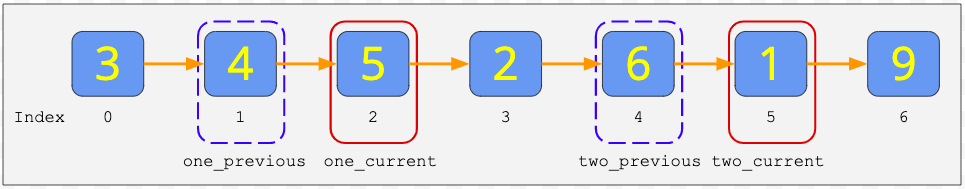
**Step 2** - Swap the references making use of a temporary reference
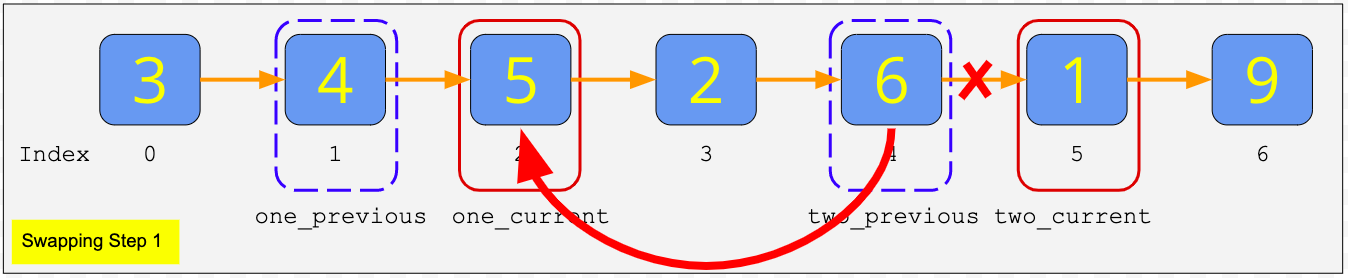

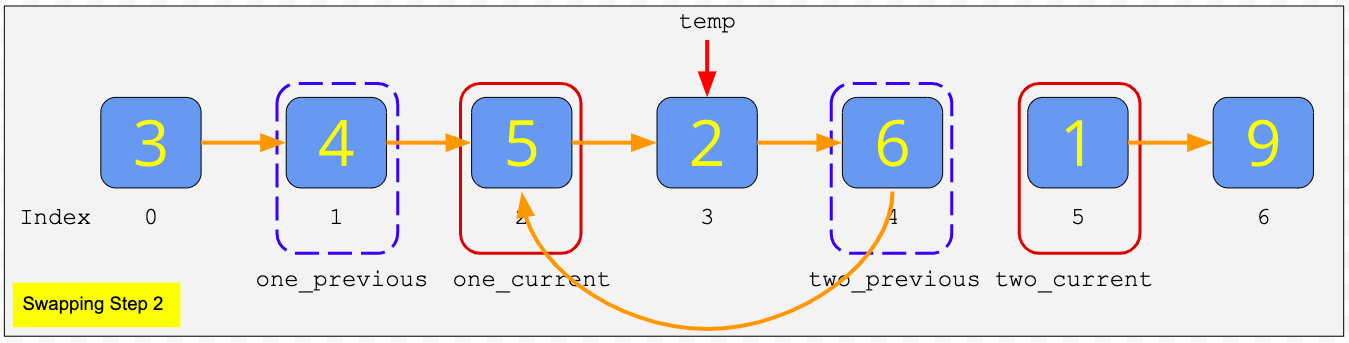

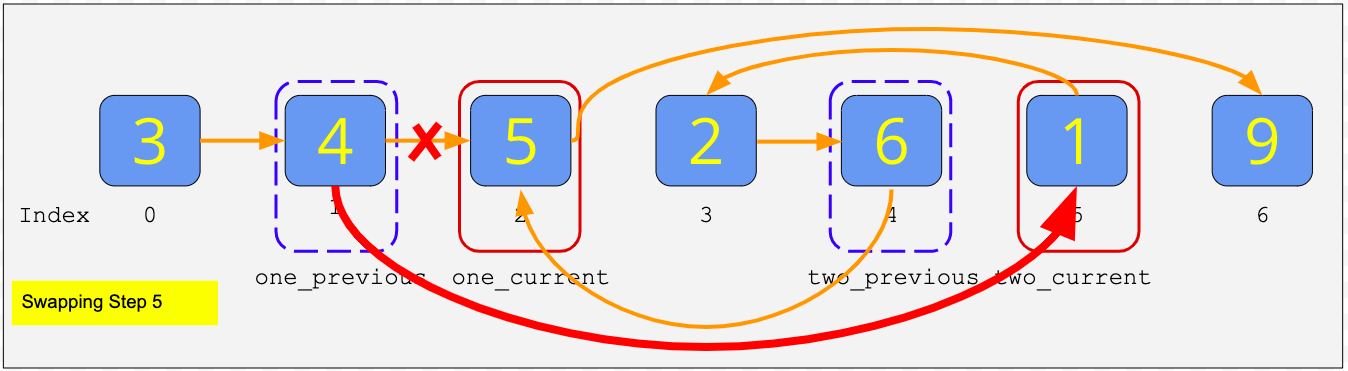
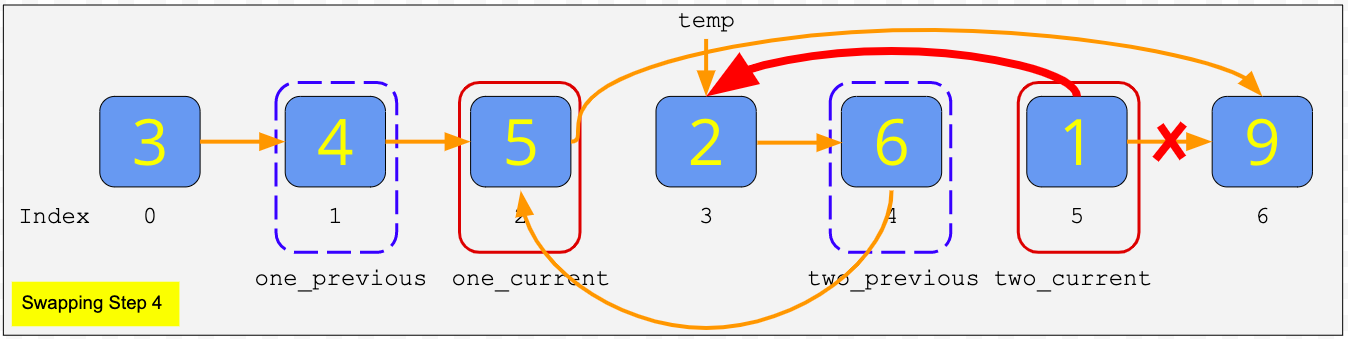
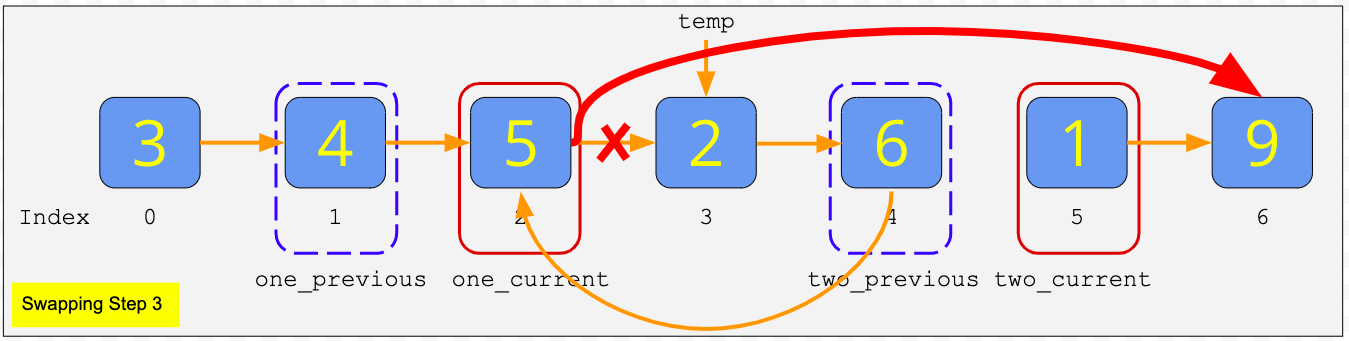
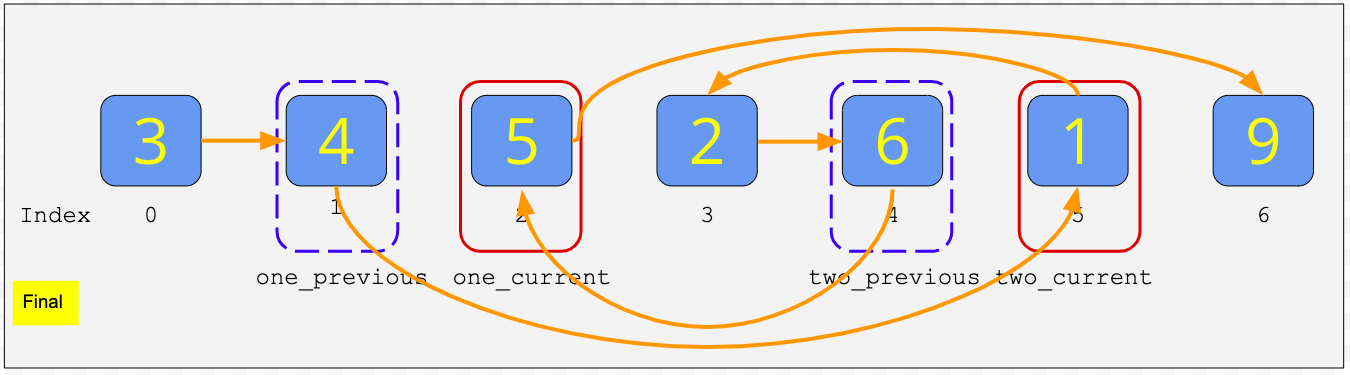


**Check the order of the updated indexes as - 0, 1, 5, 3, 4, 2, 6**, which implies that index 2 and index 5 have been swapped. 


### Helper Class

In [90]:
class Node:
    """LinkedListNode class to be used for this problem"""
    def __init__(self, data):
        self.data = data
        self.next = None

In [91]:
"""
TODO: complete this function and swap nodes present at position_one and position_two
Do not create a new linked list
"""
# Solution
"""
:param: head- head of input linked list
:param: `position_one` - indicates position (index) ONE
:param: `position_two` - indicates position (index) TWO
return: head of updated linked list with nodes swapped
"""
def swap_nodes(head, position_one, position_two):

    # If both the indices are same
    if position_one == position_two:
        return head
    
    # Helper references
    one_previous = None
    one_current = None

    two_previous = None
    two_current = None

    current_index = 0
    current_node = head 
    new_head = None

    # LOOP - find out previous and current node at both the positions (indices)
    while current_node is not None:
        
        # Position_one cannot be equal to position_two, 
        # so either one of them might be equal to the current_index
        if current_index == position_one:
            one_current = current_node
        
        elif current_index == position_two:
            two_current = current_node
            break

        # If neither of the position_one or position_two are equal to the current_index
        if one_current is None:
            one_previous = current_node
        
        two_previous = current_node
        
        # increment both the current_index and current_node
        current_node = current_node.next         
        current_index += 1
        

    # Loop ends
    
    
    '''SWAPPING LOGIC'''
    # We have identified the two nodes: one_current & two_current to be swapped, 
    # Make use of a temporary reference to swap the references
    two_previous.next = one_current
    temp = one_current.next
    one_current.next = two_current.next
    two_current.next = temp
    
    # if the node at first index is head of the original linked list
    if one_previous is None:
        new_head = two_current
    else:
        one_previous.next = two_current
        new_head = head
    # Swapping logic ends
    
    return new_head

In [92]:
def test_function(test_case):
    head = test_case[0]
    left_index = test_case[1]
    right_index = test_case[2]
    
    left_node = None
    right_node = None
    
    temp = head
    index = 0
    try:
        while temp is not None:
            if index == left_index:
                left_node = temp
            if index == right_index:
                right_node = temp
                break
            index += 1
            temp = temp.next

        updated_head = swap_nodes(head, left_index, right_index)

        temp = updated_head
        index = 0
        pass_status = [False, False]

        while temp is not None:
            if index == left_index:
                pass_status[0] = temp is right_node
            if index == right_index:
                pass_status[1] = temp is left_node

            index += 1
            temp = temp.next

        if pass_status[0] and pass_status[1]:
            print("Pass")
        else:
            print("Fail")
        return updated_head
    except Exception as e:
        print("Fail")

In [93]:
# helper functions for testing purpose
def create_linked_list(arr):
    if len(arr)==0:
        return None
    head = Node(arr[0])
    tail = head
    for data in arr[1:]:
        tail.next = Node(data)
        tail = tail.next
    return head

def print_linked_list(head):
    while head:
        print(head.data, end=" ")
        head = head.next
    print()

In [94]:
arr = [3, 4, 5, 2, 6, 1, 9]
head = create_linked_list(arr)
left_index = 3
right_index = 4

test_case = [head, left_index, right_index]
updated_head = test_function(test_case)


arr = [3, 4, 5, 2, 6, 1, 9]
left_index = 2 
right_index = 4
head = create_linked_list(arr)
test_case = [head, left_index, right_index]
updated_head = test_function(test_case)


arr = [3, 4, 5, 2, 6, 1, 9]
left_index = 0
right_index = 1
head = create_linked_list(arr)
test_case = [head, left_index, right_index]
updated_head = test_function(test_case)

Pass
Pass
Pass


# THE END